In [11]:
# encoding: utf-8
# Author: Zhuangwei Kang

import os, sys
import matplotlib.pyplot as plt
from matplotlib import style
sys.path.append('../../')
from datapsr import *
import numpy as np
style.use(['classic'])
plt.rc('axes', axisbelow=True)
dpi=600

/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


weavenet 0    2.260870
1    2.207906
2    2.465379
3    3.588235
4    6.619048
Name: packets/s(ave), dtype: float64
flannel-ipsec [1.59001957 1.61889426 1.9349353  2.34384236 2.69379845]
kube-router 0    1.319529
1    1.523617
2    2.104544
3    2.750289
4    2.704280
Name: packets/s(ave), dtype: float64


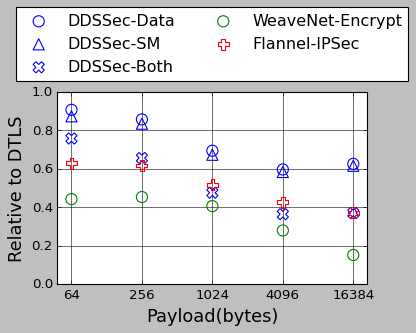

In [12]:
app_secure = ['kube-router-dds-secure-udp', 'kube-router-dds-secure-tcp']
transport_secure = ['kube-router-dtls', 'kube-router-tls']
network_secure = ['weavenet-encrypt-udp', 'weavenet-encrypt-tcp', 'flannel-ipsec-udp', 'flannel-ipsec-tcp']
secure_type = ['Transport-Secure', 'DDS-Secure']
transports = ['UDP', 'TCP']

# security granularity： secureEncryptData, secureEncryptSM, secureEncryptBoth

data_len = [64, 256, 1024, 4096, 16384]
plt.figure(figsize=(5,3))
x_vals = np.arange(len(data_len))
plt.xticks(range(len(data_len)), data_len)
plt.ylim(0, 1)

markers = ['o', '^', 'X']
dds_secure_labels = ['DDSSec-Data', 'DDSSec-SM', 'DDSSec-Both']

transport_secure_perf, _ = load_data(range(len(data_len)), transport_secure, path='./Transport-Layer-Secure')
tsp = transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['packets/s(ave)'].to_numpy()

for i, secure_level in enumerate(['secureEncryptData', 'secureEncryptSM', 'secureEncryptBoth']):
    app_secure_perf, _ = load_data(range(len(data_len)), app_secure, path='./Application-Layer-Secure/%s' % secure_level)
    asp = app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-udp']['packets/s(ave)']
    plt.scatter(x_vals, asp/tsp, label=dds_secure_labels[i], marker=markers[i], c='',edgecolors='C0', s=100)

network_secure_perf, _ = load_data(range(len(data_len)), network_secure, path='./Network-Layer-Secure')
nsp = network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-udp']['packets/s(ave)']
plt.scatter(x_vals, nsp/tsp, label='WeaveNet-Encrypt', marker='o', c='',edgecolors='C1', s=100)

print('weavenet', (transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['packets/s(ave)']/network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-udp']['packets/s(ave)']))

nsp = network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-udp']['packets/s(ave)']
plt.scatter(x_vals, nsp/tsp, label='Flannel-IPSec', marker='P', c='',edgecolors='C2', s=100)

print('flannel-ipsec', (transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['packets/s(ave)'].to_numpy()/ network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-udp']['packets/s(ave)'].to_numpy()))

print('kube-router', (transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['packets/s(ave)']/app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-udp']['packets/s(ave)']))


plt.legend(bbox_to_anchor=(0.5, 1.25), ncol=2, loc='center', scatterpoints = 1)
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Relative to DTLS', fontsize=16)
plt.grid(linestyle='-')
plt.savefig('throughput.png', dpi=dpi, bbox_inches='tight')


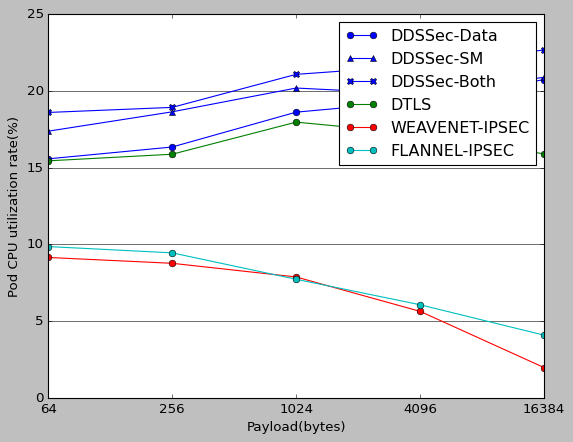

In [13]:
x_vals = np.arange(len(data_len))
plt.xticks(range(len(data_len)), data_len)
# plt.ylim(0, 100)

for i, secure_level in enumerate(['secureEncryptData', 'secureEncryptSM', 'secureEncryptBoth']):
    app_secure_perf, _ = load_data(range(len(data_len)), app_secure, path='./Application-Layer-Secure/%s' % secure_level)
    plt.plot(x_vals, app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-udp']['cpu'], label=dds_secure_labels[i], marker=markers[i], color='C0')
# plt.plot(x_vals, app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-tcp']['packets/s(ave)'], label='DDS-Secure-TCP', marker='^', color='C0')

transport_secure_perf, _ = load_data(range(len(data_len)), transport_secure, path='./Transport-Layer-Secure')
plt.plot(x_vals, transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['cpu'], label='DTLS', marker='o', color='C1')
# plt.plot(x_vals, transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-tls']['cpu'], label='TLS', marker='^', color='C1')

network_secure_perf, _ = load_data(range(len(data_len)), network_secure, path='./Network-Layer-Secure')
plt.plot(x_vals, network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-udp']['cpu'], label='WEAVENET-IPSEC', marker='o', color='C2')
# plt.plot(x_vals, network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-tcp']['cpu'], label='Weavenet-IPSec-TCP', marker='^', color='C2')

plt.plot(x_vals, network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-udp']['cpu'], label='FLANNEL-IPSEC', marker='o', color='C3')
# plt.plot(x_vals, network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-tcp']['cpu'], label='Flannel-IPSec-TCP', marker='^', color='C3')

plt.legend(bbox_to_anchor=(1.0, 1.0))
# plt.legend()
plt.xlabel('Payload(bytes)')
plt.ylabel('Pod CPU utilization rate(%)')
plt.grid(axis='y', linestyle='-')
plt.show()

/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


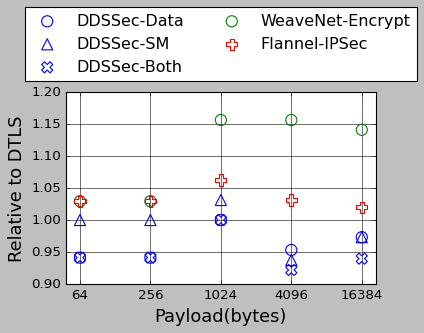

In [14]:
plt.figure(figsize=(5,3))
plt.xticks(range(len(data_len)), data_len)
pub_host_cpu = {}
sub_host_cpu = {}
x = np.arange(5)


pub_cpu_base = []
pub_cpu_std_base = []
sub_cpu_base = []
sub_cpu_std_base = []
for i in range(len(data_len)):
    data = pd.read_csv('Transport-Layer-Secure/throughputTest/kube-router-dtls/test-%d/metrics.csv' % (i))
    pub_cpu_base.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'])
    sub_cpu_base.append(data[data['name'] == 'raspberrypi89']['cpu%(90%)'])
    pub_cpu_std_base.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'])
    sub_cpu_std_base.append(data[data['name'] == 'raspberrypi89']['cpu%(std)'])
# plt.scatter(x, pub_cpu, marker='o', color='C1', label='DTLS')
# plt.fill_between(x, np.reshape(np.array(pub_cpu)-np.array(pub_cpu_std), len(x)), np.reshape(np.array(pub_cpu)+np.array(pub_cpu_std), len(x)), alpha=.2, color='C1')


for j, secure_level in enumerate(['secureEncryptData', 'secureEncryptSM', 'secureEncryptBoth']):
    pub_cpu = []
    pub_cpu_std = []
    sub_cpu = []
    sub_cpu_std = []
    for i in range(len(data_len)):
        data = pd.read_csv('Application-Layer-Secure/%s/throughputTest/kube-router-dds-secure-udp/test-%d/metrics.csv' % (secure_level, i))
        pub_cpu.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'])
        sub_cpu.append(data[data['name'] == 'raspberrypi89']['cpu%(90%)'])
        pub_cpu_std.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'])
        sub_cpu_std.append(data[data['name'] == 'raspberrypi89']['cpu%(std)'])
    
    plt.scatter(x, np.array(pub_cpu)/np.array(pub_cpu_base), marker=markers[j], c='',edgecolors='C0', label=dds_secure_labels[j], s=100)
    low = np.reshape(np.array(pub_cpu)-np.array(pub_cpu_std), len(x))
    high = np.reshape(np.array(pub_cpu)+np.array(pub_cpu_std), len(x))
    _pub_cpu_base = np.reshape(pub_cpu_base, len(x))
#     plt.fill_between(x, low/_pub_cpu_base, high/_pub_cpu_base, alpha=.3, color='C%d'%j)


pub_cpu = []
pub_cpu_std = []
sub_cpu = []
sub_cpu_std = []
for i in range(len(data_len)):
    data = pd.read_csv('Network-Layer-Secure/throughputTest/weavenet-encrypt-udp/test-%d/metrics.csv' % (i))
    pub_cpu.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'])
    sub_cpu.append(data[data['name'] == 'raspberrypi89']['cpu%(90%)'])
    pub_cpu_std.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'])
    sub_cpu_std.append(data[data['name'] == 'raspberrypi89']['cpu%(std)'])
plt.scatter(np.arange(5), np.array(pub_cpu)/np.array(pub_cpu_base), marker='o', c='',edgecolors='C1', label='WeaveNet-Encrypt', s=100)
low = np.reshape(np.array(pub_cpu)-np.array(pub_cpu_std), len(x))
high = np.reshape(np.array(pub_cpu)+np.array(pub_cpu_std), len(x))
_pub_cpu_base = np.reshape(pub_cpu_base, len(x))
# plt.fill_between(x, low/_pub_cpu_base, high/_pub_cpu_base, alpha=.3, color='C4')

pub_cpu = []
pub_cpu_std = []
sub_cpu = []
sub_cpu_std = []
for i in range(len(data_len)):
    data = pd.read_csv('Network-Layer-Secure/throughputTest/flannel-ipsec-udp/test-%d/metrics.csv' % (i))
    pub_cpu.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'])
    sub_cpu.append(data[data['name'] == 'raspberrypi89']['cpu%(90%)'])
    pub_cpu_std.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'])
    sub_cpu_std.append(data[data['name'] == 'raspberrypi89']['cpu%(std)'])
plt.scatter(np.arange(5), np.array(pub_cpu)/np.array(pub_cpu_base), marker='P', c='',edgecolors='C2', label='Flannel-IPSec', s=100)
low = np.reshape(np.array(pub_cpu)-np.array(pub_cpu_std), len(x))
high = np.reshape(np.array(pub_cpu)+np.array(pub_cpu_std), len(x))
_pub_cpu_base = np.reshape(pub_cpu_base, len(x))
# plt.fill_between(x, low/_pub_cpu_base, high/_pub_cpu_base, alpha=.3, color='C3')


plt.legend(bbox_to_anchor=(0.5, 1.25), ncol=2, loc='center', scatterpoints = 1)
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Relative to DTLS', fontsize=16)
plt.grid(linestyle='-')
plt.savefig('cpu.png', dpi=dpi, bbox_inches='tight')

/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if sys.path[0] == '':
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/Users/zhuangweikang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


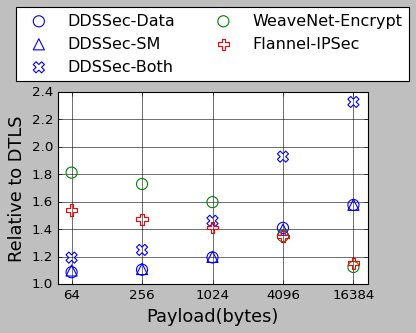

In [15]:
plt.figure(figsize=(5,3))
x_vals = np.arange(len(data_len))
plt.xticks(range(len(data_len)), data_len)

_, transport_secure_perf = load_data(range(len(data_len)), transport_secure, path='./Transport-Layer-Secure', latencyTest=True)
tsp = transport_secure_perf[transport_secure_perf['cni'] == 'kube-router-dtls']['90%'].to_numpy()

for i, secure_level in enumerate(['secureEncryptData', 'secureEncryptSM', 'secureEncryptBoth']):
    _, app_secure_perf = load_data(range(len(data_len)), app_secure, path='./Application-Layer-Secure/%s' % secure_level, latencyTest=True)
    asp = app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-udp']['90%']
    perf_std = app_secure_perf[app_secure_perf['cni'] == 'kube-router-dds-secure-udp']['std']
    plt.scatter(x_vals, asp/tsp, label=dds_secure_labels[i], marker=markers[i],  c='',edgecolors='C0', s=100)

_, network_secure_perf = load_data(range(len(data_len)), network_secure, path='./Network-Layer-Secure', latencyTest=True)
nsp = network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-udp']['90%']
perf_std = network_secure_perf[network_secure_perf['cni'] == 'weavenet-encrypt-udp']['std']
plt.scatter(x_vals, nsp/tsp, label='WeaveNet-Encrypt', marker='o',  c='',edgecolors='C1', s=100)

nsp = network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-udp']['90%']
perf_std = network_secure_perf[network_secure_perf['cni'] == 'flannel-ipsec-udp']['std']
plt.scatter(x_vals, nsp/tsp, label='Flannel-IPSec', marker='P',  c='',edgecolors='C2', s=100)
# plt.ylim(1,2.5)

plt.legend(bbox_to_anchor=(0.5, 1.25), ncol=2, loc='center', scatterpoints = 1)
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Relative to DTLS', fontsize=16)
plt.grid(linestyle='-')
plt.savefig('latency.png', dpi=dpi, bbox_inches='tight')


Description: DDS security aims to (1) cipher human-readable data into unreadable, encoded formate; (2) provide participants identity authorization; (3) support fine-grained topic/domain access control. DDS supports transport layer(DTLS, TLS) and application layer(DDS Security plugin) security. Additionally, Weavnet and Flannel offer altered security options(IPSec) at the network layer. Our previous experiments demonstrate Kuberouter has the most attractive performance in unicast tests, so this experiment employs Kuberouter as the plugin when evaluating application and transport layer security performance. Since the maximum payload size of DTLS is 16KB, we use asynchronous DataWriter to send messages when payload is greater or equal to 16KB. Different from the synchronous publishing mode, in which the process of writing data using DDS DataWriter shares the same thread with that of flushing data to network, an asynchronous publisher separates these two tasks into individual threads so that message fragmentation can be performed in the sending thread. Note the asynchronous publisher may have higher latency and resource utilization rate due to thread context switch. In terms of Weavenet, we still use its fastpath working mode, but the detected maximum effective MTU reduced to 1414 bytes because of extra overhead posed by data encryption. Likewise, the MTU of Flannel-IPsec becomes 1423 bytes. DDS security plugin(application-layer) supports data encryption in multiple granularities: encrypt topic(user) data only, encrypt RTPS sub-messages, or encrypt both. And DDS Security plugin enables users to define access control policies for specific topics, participants, and DDS domains, which can not be addressed for lower-level security implementations like DTLS/TLS and IPSec. However, DDS Security plugin currently lacks support for DDS Cloud Discovery Service, which means publishers and subscribers must know the exact IP addresses of each other when setting up connections. Therefore they are weak-coupling in this case, which in some level hinders the system scalability. 

Purpose: In this test, we demostrate the DDS performance at different security implementation layers and encryption levels from horizontal and vertical respectively, thus proposing the optimal security solution for DDS applications in Hybrid-Arch K8s deployment.

Anslysis: Experiment results show that Kuberouter DTLS consistently delivers the optimal performance. When both user data and RTPS sub-messages are encrypted, DDS Security plugin achieves higher throughput than Flannel-IPSec if the payload size is smaller than 1KB. The performance of Weavenet-IPSec on all payloads is inferior to other solutions. Horizontally, encrypting RTPS sub-messages imposes more overhead than encrypting user data. And they both provide better performance than IPSec-based solutions. Our Host-CPU utilization measurement indicates IPSec-based encryption consumes relatively more CPU resources than others, and DDS Security plugins(encryptBoth) utilizes the least CPU. The ping-pong latency test results directly illustrate that DDS Security plugin spends more time encrypting messages than DTLS and even IPSec-based methods(if the payload is larger than 1KB). Overall, if only from the perspective of data encryption, DTLS is the best choice for DDS security. Its average throughput is 2.08x of DDS Security plugin, 2.03x of Flannel-IPSec, and 3.43x of Weavenet-IPSec. However, DDS Security plugin should be selected if redundant application-level security functionalities are needed in your applications. IPSec-based data encryption offered by K8s network plugins is not recommended for DDS applications.